In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf

In [2]:
%config InlineBackend.rc={'figure.figsize': (12, 8)}

In [3]:
path = os.getcwd().replace('auxiliaries', 'pupil_deep/eye_test/label')

/home/marcos/anaconda3/envs/pupildeep/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/home/marcos/anaconda3/envs/pupildeep/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/home/marcos/anaconda3/envs/pupildeep/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been op

/home/marcos/anaconda3/envs/pupildeep/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/home/marcos/anaconda3/envs/pupildeep/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

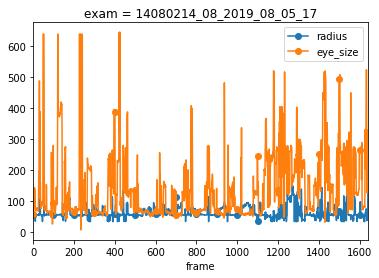

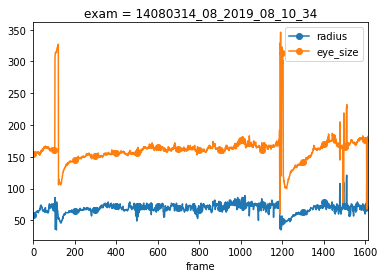

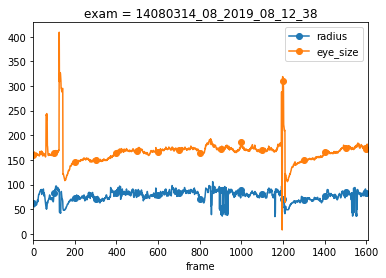

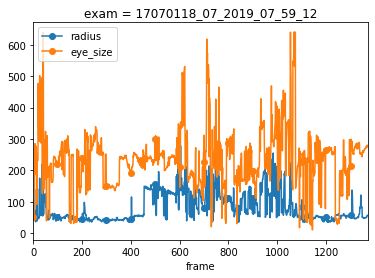

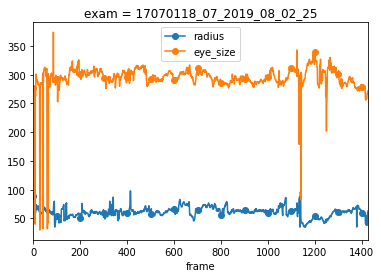

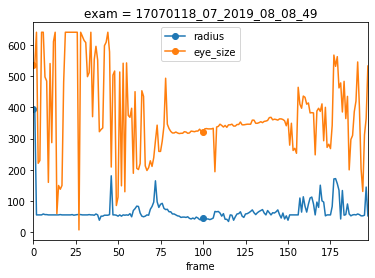

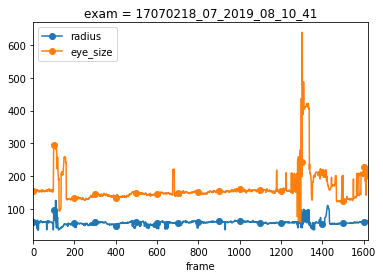

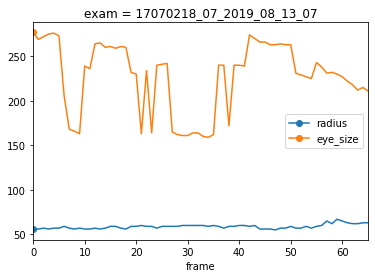

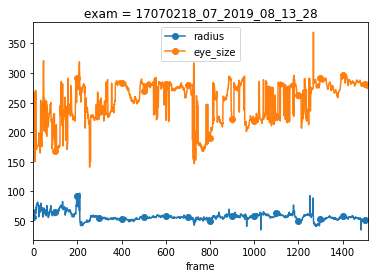

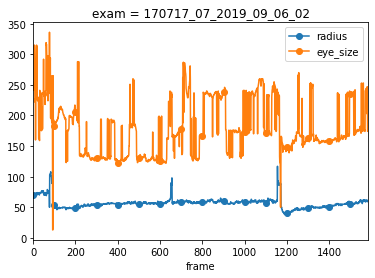

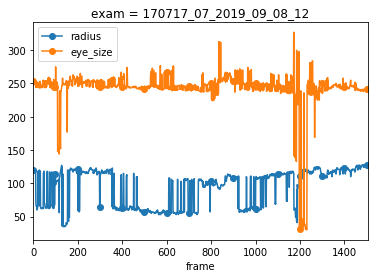

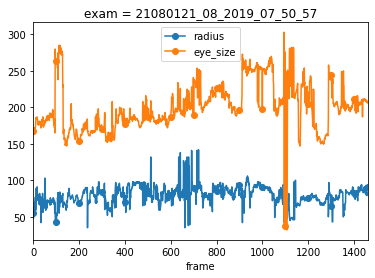

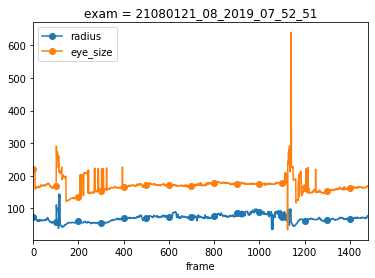

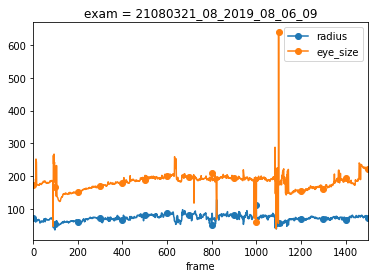

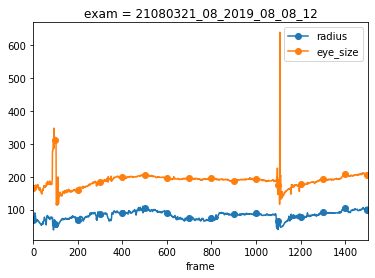

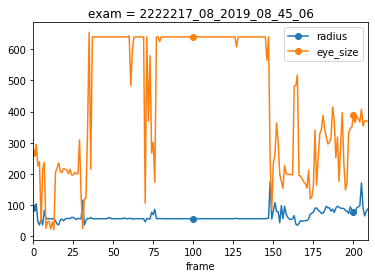

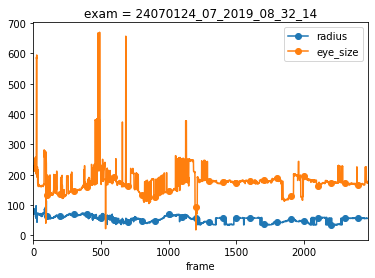

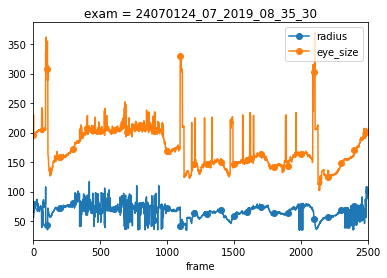

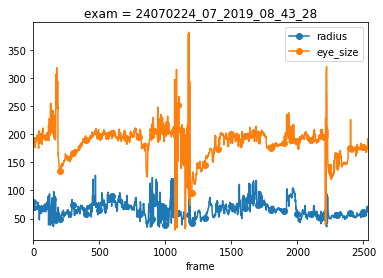

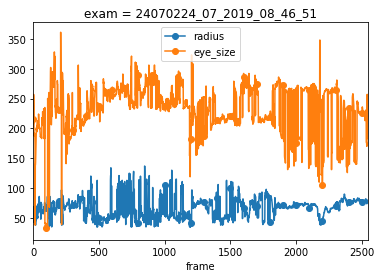

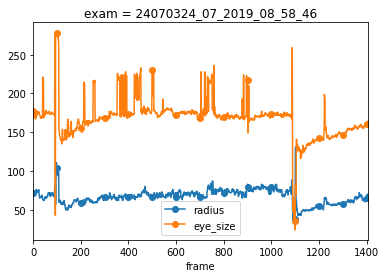

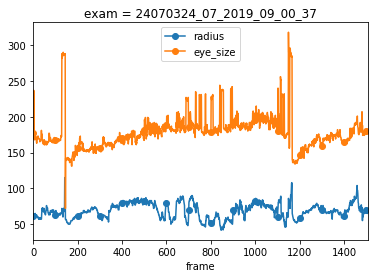

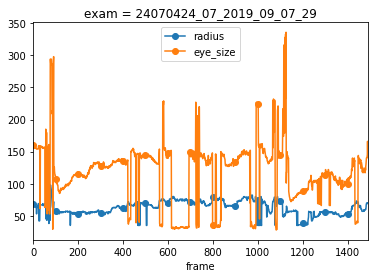

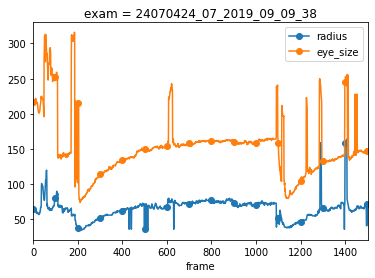

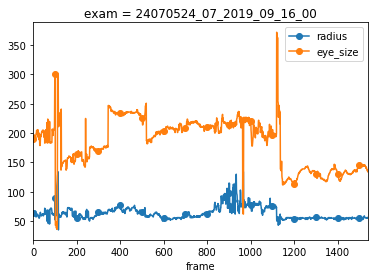

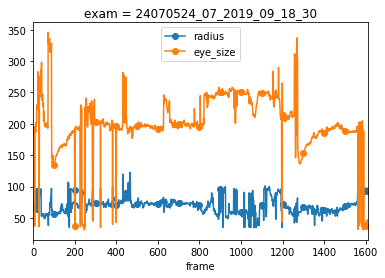

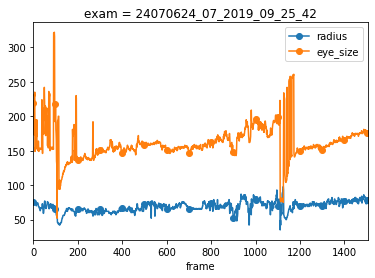

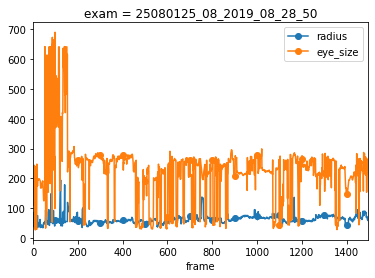

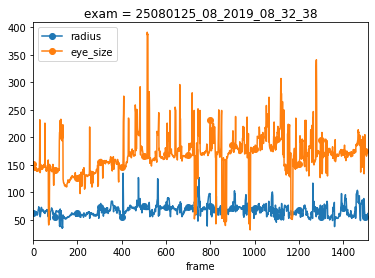

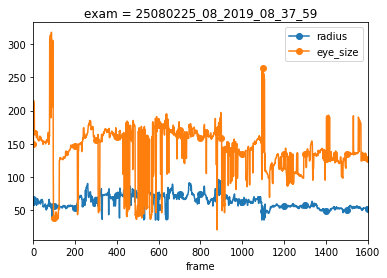

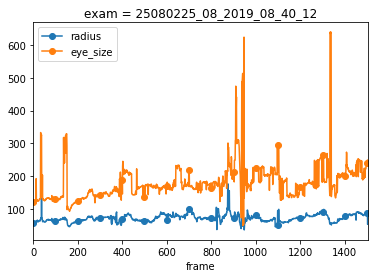

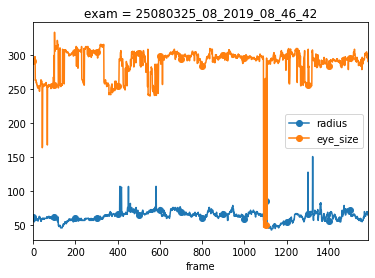

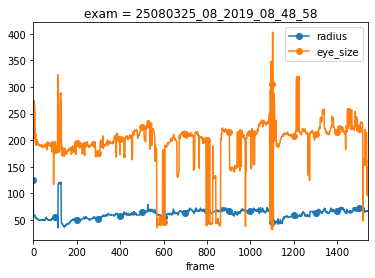

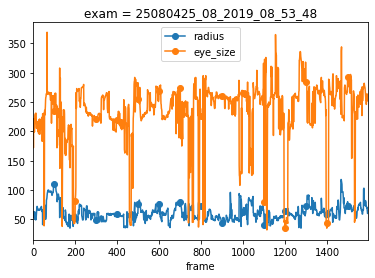

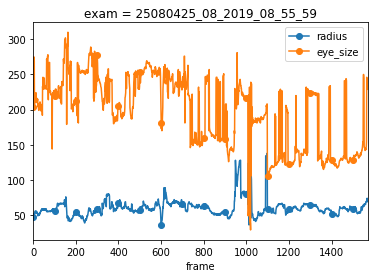

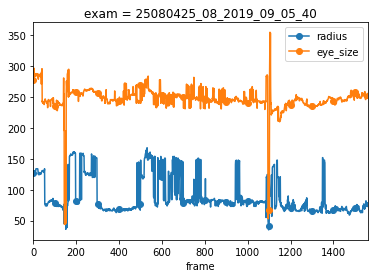

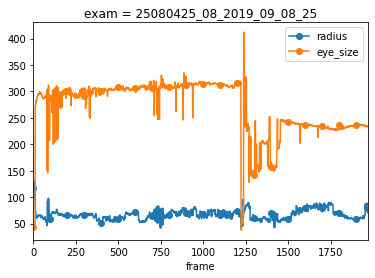

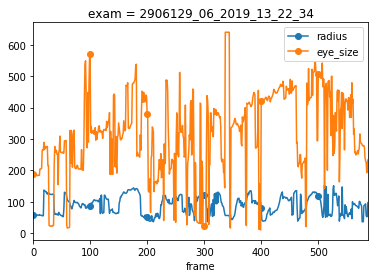

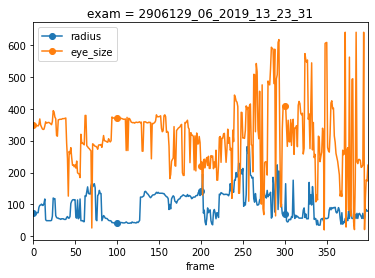

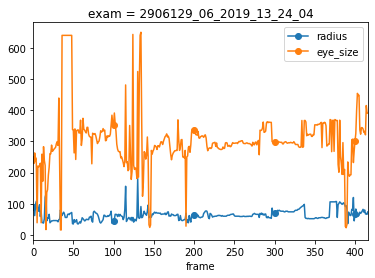

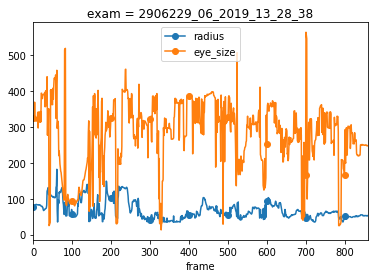

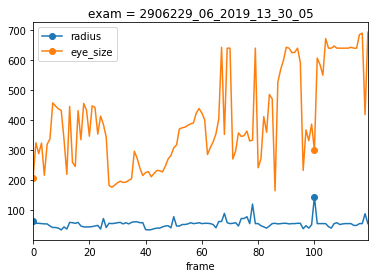

In [4]:
grapus = []
for file in os.listdir(path):
    path_data = os.path.join(path, file)
    dataset = pd.read_csv(path_data)
    exam = file.replace('_label.csv', '')
    title = 'exam = {}'.format(exam)
    ax = dataset.plot.line(x='frame', y=['radius', 'eye_size'],
                           linestyle='-', markevery=100, marker='o', title=title)
    grapus.append(ax)
    ax.figure.savefig('graphics_{}.pdf'.format(exam))